# Quiz 1

The rather noisy data below is known to have a physical model of the form:

$$y = b e^{mt}$$

Find $b$ and $m$ for the data below. 

a. Using 2 points per the book is worth 10/10 points.

b. Using all of the points per my notes is worth 12/10 points. 

Here I am using a language called [Julia](julia.org). It's open-source, Matlab-like, and a heck of a lot faster. It's built with modern computer science principles (versus the 36 year old Matlab core), and runs almost as fast as compiled code. It doesn't have as many toolboxes, but you can call Python toolboxes when necessary.

Regardless, You will recognize how it works as it's very much the same as Matlab for this solution. One advantage: You can run this by hitting shift-enter (shift-return) on each cell. You can edit them. You can play in here for free. 

In [1]:
using PyPlot
using Polynomials

In [2]:
t = linspace(0,10,11)

0.0:1.0:10.0

In [3]:
y = 3.5*exp.(-0.25*t)+randn(11)*0.1

11-element Array{Float64,1}:
 3.60191 
 2.77845 
 2.09809 
 1.7281  
 1.43206 
 1.06339 
 0.845076
 0.694369
 0.47443 
 0.413256
 0.238804

In [4]:
y = round.(y,1)

11-element Array{Float64,1}:
 3.6
 2.8
 2.1
 1.7
 1.4
 1.1
 0.8
 0.7
 0.5
 0.4
 0.2

That's how I generated $y$, but the numbers given for the quiz were:

In [5]:
y = [3.5, 2.7, 2.1, 1.8, 1.3, 1.1, 0.7, 0.6, 0.5, 0.4, 0.1]

11-element Array{Float64,1}:
 3.5
 2.7
 2.1
 1.8
 1.3
 1.1
 0.7
 0.6
 0.5
 0.4
 0.1

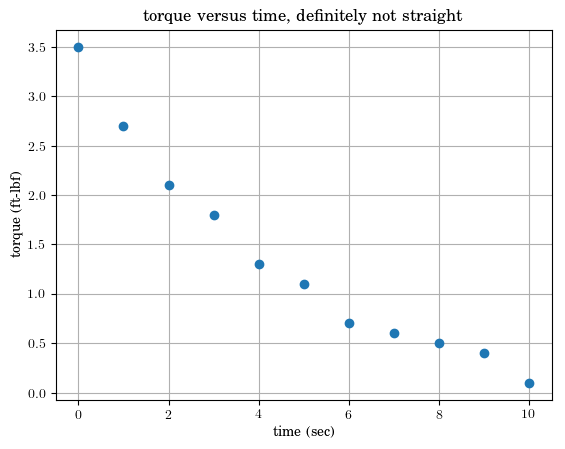

/Users/jslater/Library/Python/2.7/lib/python/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [6]:
plot(t, y, "o")
xlabel("time (sec)")
ylabel("torque (ft-lbf)")
title("torque versus time, definitely not straight")
grid("true")

A power form doesn't look right:

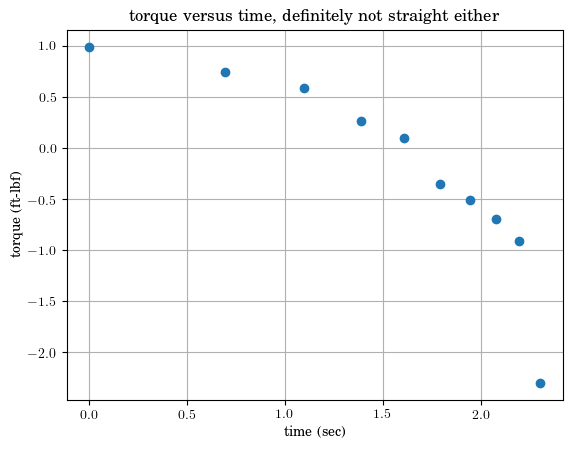

In [7]:
plot(log.(t), log.(y), "o")
xlabel("time (sec)")
ylabel("torque (ft-lbf)")
title("torque versus time, definitely not straight either")
grid("true")

Let's try exponential. Also, given that t started at zero, taking the log wasn't likely to be successful. So, it's a good bet a power form wasn't going to work.

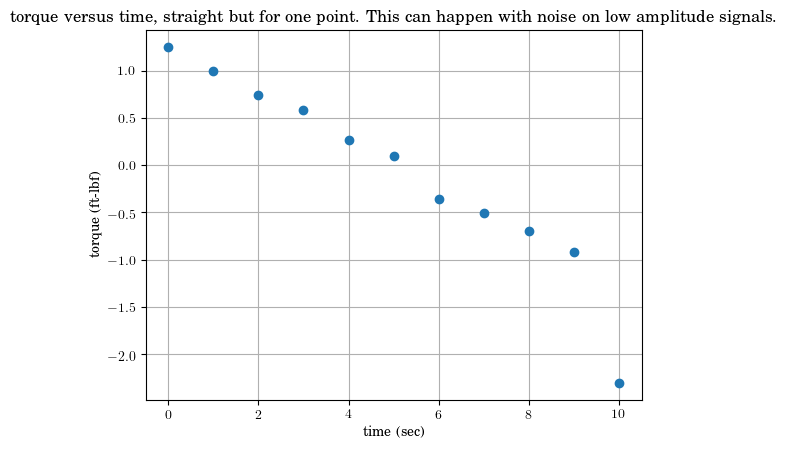

In [8]:
plot(t, log.(y), "o")
xlabel("time (sec)")
ylabel("torque (ft-lbf)")
title("torque versus time, straight but for one point. This can happen with noise on low amplitude signals.")
grid("true")

That looks more like a straight line, so it's clearly an exponential. Note that small numbers are much more easily errant than large numbers because the "noise to signal" ratio is much higher. So, that last point is likely bad and I would ignore it in a real situation. 

In [9]:
p = polyfit(t,log.(y),1)

Poly(1.402009406052156 - 0.29578570625995676*x)

In [10]:
b = exp.(coeffs(p::Poly)[1])
print("b = ", b)
m = coeffs(p::Poly)[2]
print("\n")
print("m = ", m)

b = 4.063356702553258
m = -0.29578570625995676

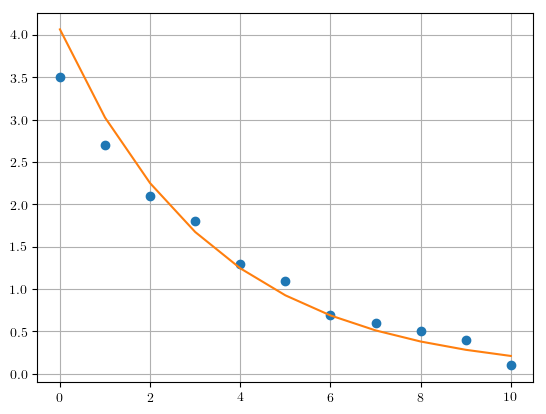

In [11]:
plot(t, y, "o", t, b*exp.(m*t))
grid("on")

What happens is we do ignore that last point?

In [27]:
y[1:end-2]

9-element Array{Float64,1}:
 3.5
 2.7
 2.1
 1.8
 1.3
 1.1
 0.7
 0.6
 0.5

In [28]:
p = polyfit(t[1:end-1],log.(y[1:end-1]),1)

Poly(1.2526619187628287 - 0.24600321049684767*x)

In [29]:
b = exp.(coeffs(p::Poly)[1])
print("b = ", b)
m = coeffs(p::Poly)[2]
print("\n")
print("m = ", m)

b = 3.4996463438048453
m = -0.24600321049684767

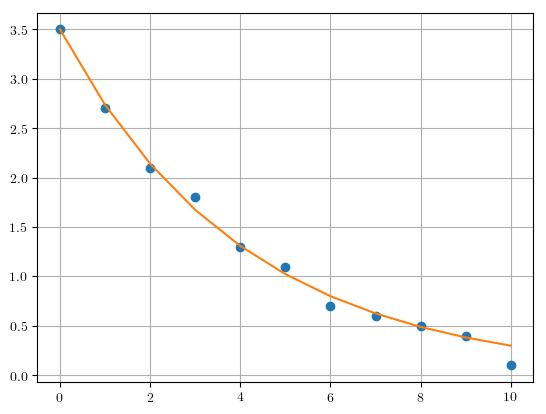

In [30]:
plot(t, y, "o", t, b*exp.(m*t))
grid("on")

That certainly looks much better. 